# Simple Linear Regression




   * Use scikit-learn to implement simple Linear Regression
   * Create a model, train,test and use the model


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import pylab as pl
import numpy as np 


### download file


In [33]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-10-04 12:18:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  98.7KB/s    in 0.7s    

2020-10-04 12:18:58 (98.7 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df= pd.read_csv("FuelConsumption.csv")
# df = the dataframe for the example to perform operation 
len(df)
#total no of rows in the dataframe 

1067

In [4]:
df.head()
#the top 5 rows of the data frame

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()
#basic get the basic idea of your data 

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
new_df=df.drop(['MODELYEAR'],axis=1)
# droping the not important in hte dataframe 
#or we can simpilly select the columns --->>
#x= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB' 'CO2EMISSIONS']]

In [7]:
new_df.head()
#x is new dataframe 

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


&lt;Figure size 720x1440 with 0 Axes&gt;

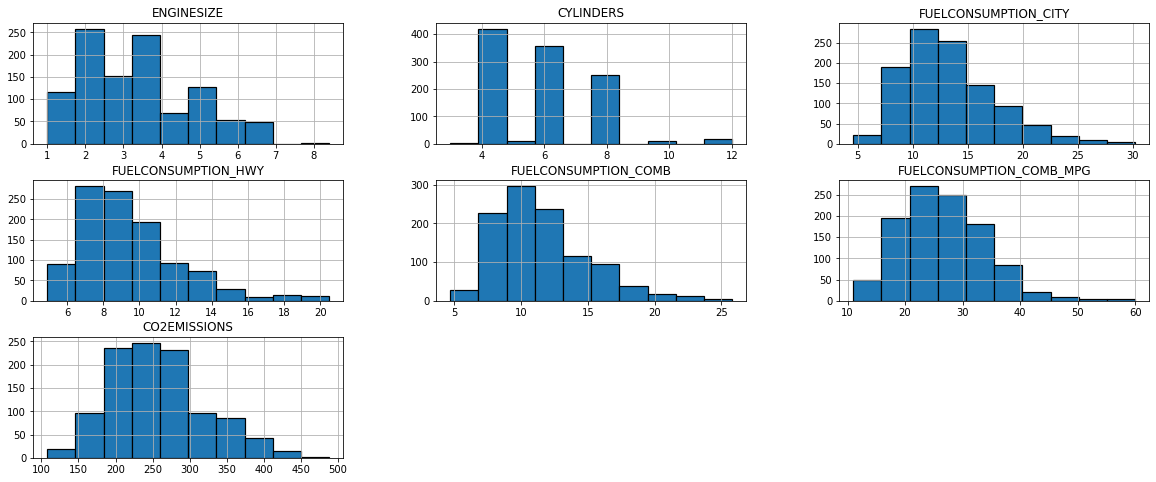

In [11]:
plt.figure(figsize=(10,20))
new_df.hist(edgecolor = 'black', linewidth=1.2, figsize=(20,8))#histogream using the hist function 
plt.show()

# scatter plot 

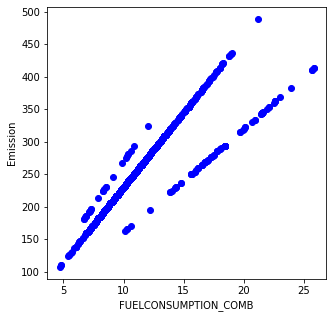

In [85]:

plt.figure(figsize=(5,5))
plt.scatter(new_df.FUELCONSUMPTION_COMB, new_df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()


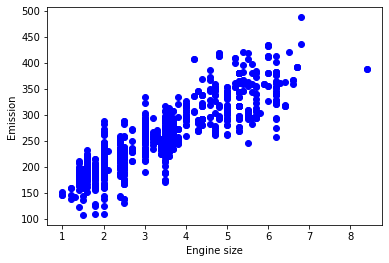

In [92]:
plt.scatter(new_df.ENGINESIZE,new_df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

# test and train data split

In [12]:
#split using the index split 
index = np.random.rand(len(df)) < 0.8

train = new_df[index]
#the not(~) index split data 
test = new_df[~index]

# Modeling

### Using sklearn package to model data.


In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.07051321]]
Intercept:  [69.86384863]


Text(0, 0.5, &#39;Emission&#39;)

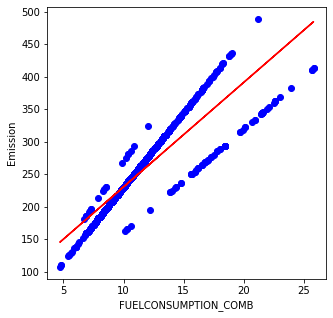

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.43469415]]
Intercept:  [124.46322515]


Text(0, 0.5, &#39;Emission&#39;)

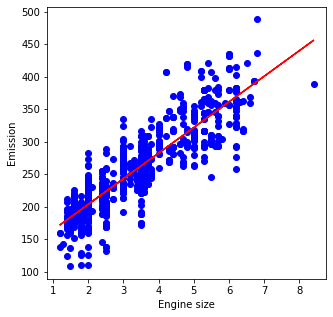

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")